# Inch to USDT Project

<p>Download required packages:</p>
<p>Numpy</p>
<p>Pandas</p>
<p>Seaborn</p>
<p>Plotly</p>
<p>Matplotlib</p>
<p>Pandas_ta or talib</p>
<p>Sklearn</p>
<p>Scikeras</p>
<p>Tensorflow</p>

In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib as mpl
from matplotlib import rcParams
import warnings
import datetime as dt
import time as t
import math
import os

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.model_selection import TimeSeriesSplit, learning_curve, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score, confusion_matrix
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import fetch_openml
from scikeras.wrappers import KerasRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, concatenate, Reshape
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings('ignore')

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Loading Dataset

In [2]:
df = pd.read_csv("Datas\Binance_1INCHUSDT_1h (1).csv", delimiter=",", index_col='Date', parse_dates=['Date'])
df.head(10)

,Symbol,Open,High,Low,Close,Volume 1INCH,Volume USDT,tradecount
Date,,,,,,,,
2023-10-19 23:00:00,1INCHUSDT,0.2435,0.2442,0.2433,0.2436,253236.8,61696.30641,352
2023-10-19 22:00:00,1INCHUSDT,0.2432,0.2439,0.2429,0.2434,101621.2,24736.31761,299
2023-10-19 21:00:00,1INCHUSDT,0.2472,0.2473,0.2427,0.2431,324836.5,79392.19887,780
2023-10-19 20:00:00,1INCHUSDT,0.2456,0.2478,0.2448,0.2472,359589.1,88541.75689,890
2023-10-19 19:00:00,1INCHUSDT,0.2443,0.2458,0.2442,0.2454,124860.2,30589.04366,316
2023-10-19 18:00:00,1INCHUSDT,0.2446,0.2454,0.2438,0.2444,197413.8,48278.53129,407
2023-10-19 17:00:00,1INCHUSDT,0.2458,0.2458,0.2433,0.2448,306781.2,75094.33596,680
2023-10-19 16:00:00,1INCHUSDT,0.2470,0.2488,0.2455,0.2458,1011725.9,250049.69081,1374
2023-10-19 15:00:00,1INCHUSDT,0.2467,0.2478,0.2454,0.2472,472579.3,116591.70086,888


In [3]:
df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Close', 'Volume 1INCH', 'Volume USDT',
       'tradecount'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24672 entries, 2023-10-19 23:00:00 to 2020-12-25 05:00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        24672 non-null  object 
 1   Open          24672 non-null  float64
 2   High          24672 non-null  float64
 3   Low           24672 non-null  float64
 4   Close         24672 non-null  float64
 5   Volume 1INCH  24672 non-null  float64
 6   Volume USDT   24672 non-null  float64
 7   tradecount    24672 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.7+ MB


There are no null value so we can continue working on examining our data. 

In [5]:
df.describe()

,Open,High,Low,Close,Volume 1INCH,Volume USDT,tradecount
count,24672.000000,24672.000000,24672.000000,24672.000000,2.467200e+04,2.467200e+04,24672.000000
mean,1.728424,1.748911,1.706915,1.728408,4.415206e+05,9.315547e+05,3092.458414
std,1.575206,1.598287,1.550845,1.575185,8.714524e+05,2.901046e+06,7679.835670
min,0.200000,0.223500,0.200000,0.221700,0.000000e+00,0.000000e+00,0.000000
25%,0.513000,0.516000,0.509000,0.513000,1.317910e+05,7.772265e+04,458.000000
50%,0.926000,0.936000,0.917000,0.926000,2.453122e+05,2.710018e+05,1176.500000
75%,2.707325,2.742925,2.669050,2.707550,4.684321e+05,9.993602e+05,3543.500000
max,7.762900,7.874800,7.593200,7.768400,3.597447e+07,2.341467e+08,596071.000000


## Preprocessing Step

In [6]:
# Create the target column
df['Target'] = df['Close'].shift(-1) - df['Close']

df['Target'] = df['Target'].apply(lambda x: 1 if x > 0 else -1)

df.head(10)

,Symbol,Open,High,Low,Close,Volume 1INCH,Volume USDT,tradecount,Target
Date,,,,,,,,,
2023-10-19 23:00:00,1INCHUSDT,0.2435,0.2442,0.2433,0.2436,253236.8,61696.30641,352,-1
2023-10-19 22:00:00,1INCHUSDT,0.2432,0.2439,0.2429,0.2434,101621.2,24736.31761,299,-1
2023-10-19 21:00:00,1INCHUSDT,0.2472,0.2473,0.2427,0.2431,324836.5,79392.19887,780,1
2023-10-19 20:00:00,1INCHUSDT,0.2456,0.2478,0.2448,0.2472,359589.1,88541.75689,890,-1
2023-10-19 19:00:00,1INCHUSDT,0.2443,0.2458,0.2442,0.2454,124860.2,30589.04366,316,-1
2023-10-19 18:00:00,1INCHUSDT,0.2446,0.2454,0.2438,0.2444,197413.8,48278.53129,407,1
2023-10-19 17:00:00,1INCHUSDT,0.2458,0.2458,0.2433,0.2448,306781.2,75094.33596,680,1
2023-10-19 16:00:00,1INCHUSDT,0.2470,0.2488,0.2455,0.2458,1011725.9,250049.69081,1374,1
2023-10-19 15:00:00,1INCHUSDT,0.2467,0.2478,0.2454,0.2472,472579.3,116591.70086,888,-1


In [7]:
# Remove unnecessary columns
df.drop(columns=['Symbol', 'Volume USDT'], inplace= True)

In [8]:
df_new = df.sort_index(ascending=True)

In [9]:
df_new.head()

,Open,High,Low,Close,Volume 1INCH,tradecount,Target
Date,,,,,,,
2020-12-25 05:00:00,0.2000,3.0885,0.2000,2.5826,13125130.77,48768,-1
2020-12-25 06:00:00,2.5824,2.6900,2.2249,2.5059,9270672.93,31099,1
2020-12-25 07:00:00,2.5152,2.8870,2.3609,2.6237,7923760.56,33001,-1
2020-12-25 08:00:00,2.6318,2.8247,2.4650,2.6134,6625565.00,30459,1
2020-12-25 09:00:00,2.6104,2.7498,2.5629,2.6365,3739132.73,21023,-1


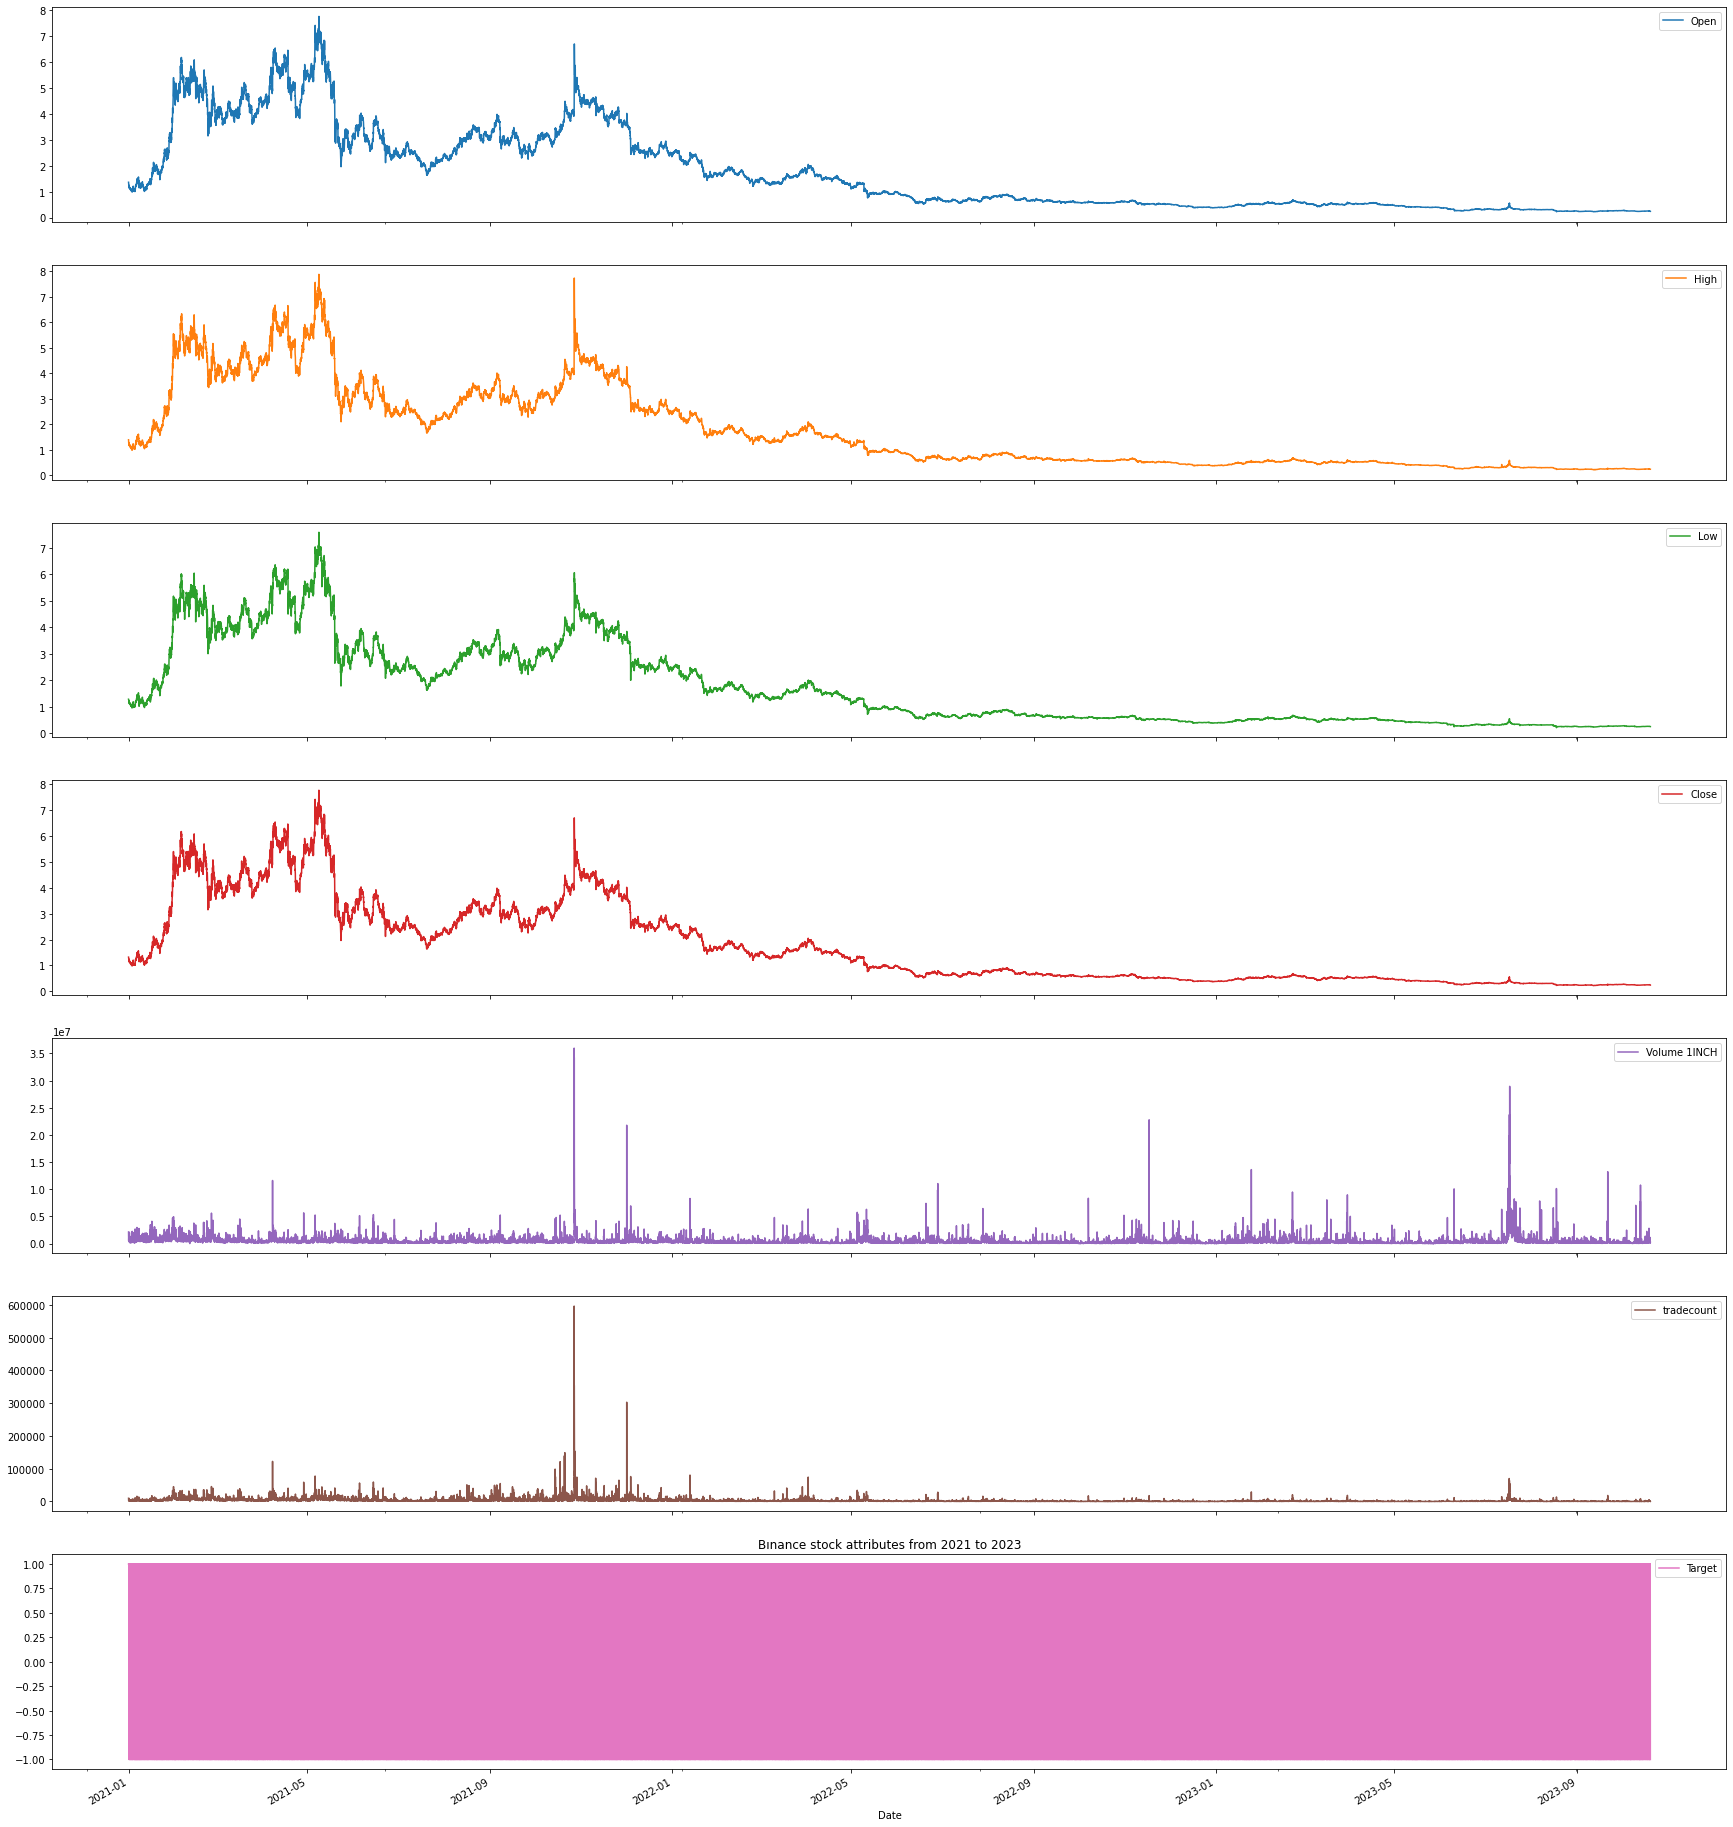

In [10]:
df_new['2021':'2023'].plot(subplots=True, figsize=(30, 36))
plt.title('Bınance stock attributes from 2021 to 2023')
plt.savefig('stocks.png')
plt.show()

## Feature Adding

1- Looking for what kind of features available in pandas_ta
2- Add lots of technical indicators based upon articles' choices


In [11]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [12]:
df_new.ta.sma(length=10, append=True)
df_new.ta.sma(length=20, append=True)
df_new.ta.sma(length=100, append=True)
df_new.ta.ema(length=5, append=True)
df_new.ta.ema(length=10, append=True)
df_new.ta.rsi(length=9, append=True)
df_new.ta.log_return(length=1, append=True)
df_new.ta.log_return(length=3, append=True)
df_new.ta.log_return(length=5, append=True)
df_new.ta.roc(length=5, append=True)
df_new.ta.log_return(length=1, append=True)
df_new.ta.rvi(length=30, append=True)
df_new.ta.rvi(length=180, append=True)
df_new.ta.rvi(length=270, append=True)
df_new.ta.rvi(length=360, append=True)
df_new.ta.rvi(length=60, append=True)
df_new.ta.rvi(length=90, append=True)
df_new.ta.macd(append=True)
df_new.ta.willr(length=5, append=True)
df_new.ta.cci(append=True)
df_new.ta.mom(append=True)
df_new.ta.atr(append=True)
df_new.ta.amat(append=True)
df_new.head(100)

,Open,High,Low,Close,Volume 1INCH,tradecount,Target,SMA_10,SMA_20,SMA_100,...,RVI_90,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,WILLR_5,CCI_14_0.015,MOM_10,ATRr_14,AMATe_LR_8_21_2,AMATe_SR_8_21_2
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-25 05:00:00,0.2000,3.0885,0.2000,2.5826,13125130.77,48768,-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2020-12-25 06:00:00,2.5824,2.6900,2.2249,2.5059,9270672.93,31099,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2020-12-25 07:00:00,2.5152,2.8870,2.3609,2.6237,7923760.56,33001,-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2020-12-25 08:00:00,2.6318,2.8247,2.4650,2.6134,6625565.00,30459,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2020-12-25 09:00:00,2.6104,2.7498,2.5629,2.6365,3739132.73,21023,-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-15.648260,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-29 04:00:00,0.9100,0.9448,0.9010,0.9426,2630370.46,6883,-1,1.04374,1.105370,NaN,...,3.888091,-0.072614,-0.014164,-0.058450,-78.096948,-158.409167,-0.1764,0.067725,0,1
2020-12-29 05:00:00,0.9426,0.9426,0.9100,0.9370,1414056.08,4999,1,1.02393,1.091100,NaN,...,3.814886,-0.075344,-0.013516,-0.061829,-75.648253,-123.340387,-0.1981,0.065214,0,1
2020-12-29 06:00:00,0.9370,0.9372,0.8737,0.8964,2162981.47,5446,1,1.00385,1.076885,NaN,...,3.744054,-0.079863,-0.014428,-0.065436,-86.694021,-118.412037,-0.2008,0.065092,0,1


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24672 entries, 2020-12-25 05:00:00 to 2023-10-19 23:00:00
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             24672 non-null  float64
 1   High             24672 non-null  float64
 2   Low              24672 non-null  float64
 3   Close            24672 non-null  float64
 4   Volume 1INCH     24672 non-null  float64
 5   tradecount       24672 non-null  int64  
 6   Target           24672 non-null  int64  
 7   SMA_10           24663 non-null  float64
 8   SMA_20           24653 non-null  float64
 9   SMA_100          24573 non-null  float64
 10  EMA_5            24668 non-null  float64
 11  EMA_10           24663 non-null  float64
 12  RSI_9            24663 non-null  float64
 13  LOGRET_1         24671 non-null  float64
 14  LOGRET_3         24669 non-null  float64
 15  LOGRET_5         24667 non-null  float64
 16  ROC_5            24667 

## Handling Missing Values

When we look at info values, it can be derived that from 24672 row, at least 24313 rows are non-null. Because this dataset is time series dataset, dropping NaN values is necessary. 

In [14]:
df_new1 = df_new.iloc[400:]

In [15]:
df_new1.head()

,Open,High,Low,Close,Volume 1INCH,tradecount,Target,SMA_10,SMA_20,SMA_100,...,RVI_90,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,WILLR_5,CCI_14_0.015,MOM_10,ATRr_14,AMATe_LR_8_21_2,AMATe_SR_8_21_2
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-10 21:00:00,1.1890,1.2250,1.1825,1.2250,487164.76,2338,-1,1.22839,1.277765,1.308747,...,49.426063,-0.018193,-0.011751,-0.006442,-14.050822,-61.305665,-0.0022,0.060792,0,1
2021-01-10 22:00:00,1.2241,1.2400,1.1980,1.2029,429493.72,1994,1,1.22290,1.271475,1.306123,...,48.475670,-0.019292,-0.010280,-0.009012,-30.568012,-48.908559,-0.0549,0.059450,0,1
2021-01-10 23:00:00,1.2029,1.2326,1.2001,1.2058,243153.82,1181,-1,1.21452,1.266435,1.304418,...,49.456218,-0.019703,-0.008552,-0.011150,-26.307692,-40.502095,-0.0838,0.057525,0,1
2021-01-11 00:00:00,1.2032,1.2126,1.1650,1.1729,511019.91,2751,1,1.20820,1.257280,1.302158,...,48.523527,-0.022424,-0.009019,-0.013405,-51.615385,-103.503155,-0.0632,0.056816,0,1
2021-01-11 01:00:00,1.1725,1.1993,1.1500,1.1683,479973.16,2141,1,1.19943,1.249270,1.299938,...,47.609410,-0.024668,-0.009010,-0.015657,-79.666667,-118.686406,-0.0877,0.056279,0,1


In [16]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24272 entries, 2021-01-10 21:00:00 to 2023-10-19 23:00:00
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             24272 non-null  float64
 1   High             24272 non-null  float64
 2   Low              24272 non-null  float64
 3   Close            24272 non-null  float64
 4   Volume 1INCH     24272 non-null  float64
 5   tradecount       24272 non-null  int64  
 6   Target           24272 non-null  int64  
 7   SMA_10           24272 non-null  float64
 8   SMA_20           24272 non-null  float64
 9   SMA_100          24272 non-null  float64
 10  EMA_5            24272 non-null  float64
 11  EMA_10           24272 non-null  float64
 12  RSI_9            24272 non-null  float64
 13  LOGRET_1         24272 non-null  float64
 14  LOGRET_3         24272 non-null  float64
 15  LOGRET_5         24272 non-null  float64
 16  ROC_5            24272 

Info shows us that there are no missing values in our newly constructed dataset.

## Normalizing for Easier Feature Selection Process

In [17]:
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume 1INCH', 'tradecount',
       'SMA_10', 'SMA_20', 'SMA_100', 'EMA_5', 'EMA_10', 'RSI_9', 'LOGRET_1',
       'LOGRET_3', 'LOGRET_5', 'ROC_5', 'RVI_30', 'RVI_180', 'RVI_270',
       'RVI_360', 'RVI_60', 'RVI_90', 'MACD_12_26_9', 'MACDh_12_26_9',
       'MACDs_12_26_9', 'WILLR_5', 'CCI_14_0.015', 'MOM_10', 'ATRr_14',
       'AMATe_LR_8_21_2', 'AMATe_SR_8_21_2']
target_column = 'Target'
# Min-Max Normalization
min_max_scaler = MinMaxScaler()
X = df_new1[feature_columns]
y = df_new1[target_column]
data_normalized_minmax = df_new1.copy()
data_normalized_minmax[feature_columns] = min_max_scaler.fit_transform(X)
data_normalized_minmax['Target'] = (df_new1['Target'] - df_new1['Target'].min()) / (df_new1['Target'].max() - df_new1['Target'].min())

X = data_normalized_minmax[feature_columns]
y = data_normalized_minmax['Target']
print("\nMin-Max Normalized Data:")
print(data_normalized_minmax)


Min-Max Normalized Data:
                         Open      High       Low     Close  Volume 1INCH  \
Date                                                                        
2021-01-10 21:00:00  0.128269  0.130893  0.132763  0.132946      0.013542   
2021-01-10 22:00:00  0.132923  0.132853  0.134860  0.130017      0.011939   
2021-01-10 23:00:00  0.130112  0.131886  0.135144  0.130401      0.006759   
2021-01-11 00:00:00  0.130152  0.129272  0.130396  0.126042      0.014205   
2021-01-11 01:00:00  0.126081  0.127534  0.128367  0.125432      0.013342   
...                       ...       ...       ...       ...           ...   
2023-10-19 19:00:00  0.002997  0.002915  0.005831  0.003140      0.003471   
2023-10-19 20:00:00  0.003169  0.003176  0.005912  0.003379      0.009996   
2023-10-19 21:00:00  0.003381  0.003111  0.005628  0.002836      0.009030   
2023-10-19 22:00:00  0.002851  0.002666  0.005655  0.002875      0.002825   
2023-10-19 23:00:00  0.002891  0.002705  0.005709 

In [18]:
data_normalized_minmax.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24272 entries, 2021-01-10 21:00:00 to 2023-10-19 23:00:00
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             24272 non-null  float64
 1   High             24272 non-null  float64
 2   Low              24272 non-null  float64
 3   Close            24272 non-null  float64
 4   Volume 1INCH     24272 non-null  float64
 5   tradecount       24272 non-null  float64
 6   Target           24272 non-null  float64
 7   SMA_10           24272 non-null  float64
 8   SMA_20           24272 non-null  float64
 9   SMA_100          24272 non-null  float64
 10  EMA_5            24272 non-null  float64
 11  EMA_10           24272 non-null  float64
 12  RSI_9            24272 non-null  float64
 13  LOGRET_1         24272 non-null  float64
 14  LOGRET_3         24272 non-null  float64
 15  LOGRET_5         24272 non-null  float64
 16  ROC_5            24272 

## Feature Selection with SelectKBest

In [19]:
k = 6  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get the scores and feature names
scores = selector.scores_
features = X.columns

# Create a DataFrame for visualization
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Feature Scores:")
print(feature_scores)

# Selected features
selected_features = feature_scores['Feature'].head(k).tolist()
print(f"\nTop {k} Features Selected: {selected_features}")

Feature Scores:
            Feature         Score
12         LOGRET_1  15764.510894
25          WILLR_5   9937.446794
16           RVI_30   3297.663717
13         LOGRET_3   2967.516822
11            RSI_9   2721.591781
26     CCI_14_0.015   1732.295753
20           RVI_60   1636.636952
14         LOGRET_5   1476.463354
15            ROC_5   1440.958592
21           RVI_90   1049.658614
29  AMATe_LR_8_21_2    749.117789
30  AMATe_SR_8_21_2    749.117789
17          RVI_180    517.339362
27           MOM_10    340.797961
18          RVI_270    215.275870
23    MACDh_12_26_9     75.418355
19          RVI_360     73.132548
0              Open     49.857067
6            SMA_10     43.871001
7            SMA_20     43.555661
10           EMA_10     42.368826
8           SMA_100     42.318676
9             EMA_5     39.954405
1              High     37.150433
2               Low     35.741271
28          ATRr_14     35.630392
3             Close     26.291251
4      Volume 1INCH      9.43835

Top 6 Features are : LOGRET_1, WILLR_5, RVI_30, LOGRET_3, RSI_9, CCI_14_0.015

##  Feature Selection with Correlation Analysis

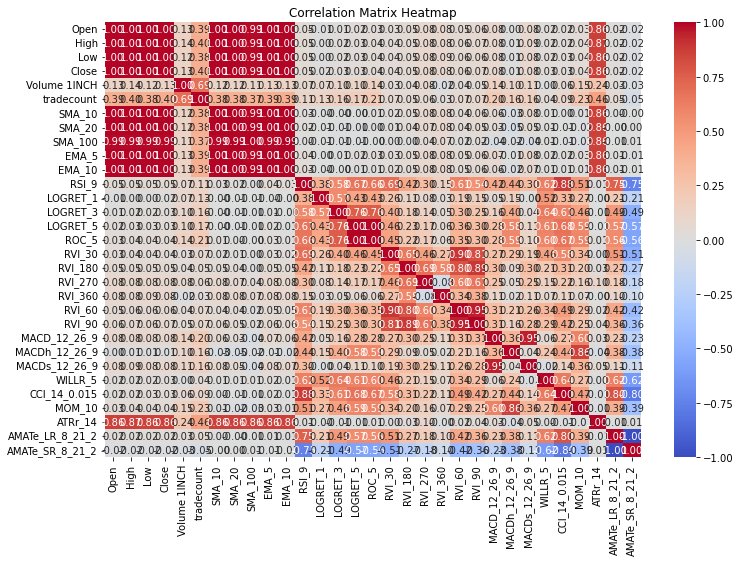


Highly Correlated Feature Pairs:
Open and High: 1.00
Open and Low: 1.00
Open and Close: 1.00
Open and SMA_10: 1.00
Open and SMA_20: 1.00
Open and SMA_100: 0.99
Open and EMA_5: 1.00
Open and EMA_10: 1.00
Open and ATRr_14: 0.86
High and Open: 1.00
High and Low: 1.00
High and Close: 1.00
High and SMA_10: 1.00
High and SMA_20: 1.00
High and SMA_100: 0.99
High and EMA_5: 1.00
High and EMA_10: 1.00
High and ATRr_14: 0.87
Low and Open: 1.00
Low and High: 1.00
Low and Close: 1.00
Low and SMA_10: 1.00
Low and SMA_20: 1.00
Low and SMA_100: 0.99
Low and EMA_5: 1.00
Low and EMA_10: 1.00
Low and ATRr_14: 0.86
Close and Open: 1.00
Close and High: 1.00
Close and Low: 1.00
Close and SMA_10: 1.00
Close and SMA_20: 1.00
Close and SMA_100: 0.99
Close and EMA_5: 1.00
Close and EMA_10: 1.00
Close and ATRr_14: 0.86
SMA_10 and Open: 1.00
SMA_10 and High: 1.00
SMA_10 and Low: 1.00
SMA_10 and Close: 1.00
SMA_10 and SMA_20: 1.00
SMA_10 and SMA_100: 0.99
SMA_10 and EMA_5: 1.00
SMA_10 and EMA_10: 1.00
SMA_10 and

In [20]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identify highly correlated features
threshold = 0.7  # Set a threshold for high correlation
high_corr_pairs = [
    (col1, col2, X.corr().loc[col1, col2])
    for col1 in X.corr().columns
    for col2 in X.corr().columns
    if col1 != col2 and abs(X.corr().loc[col1, col2]) > threshold
]

# Display highly correlated feature pairs
print("\nHighly Correlated Feature Pairs:")
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} and {col2}: {corr_value:.2f}")


When we look at correlation matrix, SMA_10, SMA_20, EMA_5, EMA_10, and ATRr_14 have high correlation with closing price. With 6 features that are mentioned in SelectKBest part, these would be quite useful for lstm and lstm+cnn training process.

## Dropping Unnecessary Columns

In [21]:
data_normalized_minmax.drop(columns=['tradecount', 'SMA_100','LOGRET_5', 'ROC_5', 'RVI_180', 'RVI_270', 'RVI_360', 'RVI_60', 'RVI_90', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'MOM_10','AMATe_LR_8_21_2', 'AMATe_SR_8_21_2'], inplace= True)

In [22]:
df_new1.drop(columns=['tradecount', 'SMA_100','LOGRET_5', 'ROC_5', 'RVI_180', 'RVI_270', 'RVI_360', 'RVI_60', 'RVI_90', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'MOM_10','AMATe_LR_8_21_2', 'AMATe_SR_8_21_2'], inplace= True)

In [23]:
d_n_m = data_normalized_minmax
df_new2 = df_new1

In [24]:
d_n_m.head()

,Open,High,Low,Close,Volume 1INCH,Target,SMA_10,SMA_20,EMA_5,EMA_10,RSI_9,LOGRET_1,LOGRET_3,RVI_30,WILLR_5,CCI_14_0.015,ATRr_14
Date,,,,,,,,,,,,,,,,,
2021-01-10 21:00:00,0.128269,0.130893,0.132763,0.132946,0.013542,0.0,0.138465,0.148647,0.133721,0.138873,0.445365,0.564003,0.501184,0.423968,0.859492,0.429640,0.128122
2021-01-10 22:00:00,0.132923,0.132853,0.134860,0.130017,0.011939,1.0,0.137708,0.147759,0.133364,0.138250,0.397937,0.479168,0.500109,0.383162,0.694320,0.443033,0.125242
2021-01-10 23:00:00,0.130112,0.131886,0.135144,0.130401,0.006759,0.0,0.136553,0.147047,0.133258,0.137813,0.406820,0.514342,0.495273,0.436127,0.736923,0.452114,0.121112
2021-01-11 00:00:00,0.130152,0.129272,0.130396,0.126042,0.014205,1.0,0.135682,0.145753,0.131702,0.136627,0.337494,0.463028,0.429544,0.393190,0.483846,0.384055,0.119591
2021-01-11 01:00:00,0.126081,0.127534,0.128367,0.125432,0.013342,1.0,0.134473,0.144621,0.130457,0.135541,0.328421,0.503527,0.445401,0.351492,0.203333,0.367653,0.118439


In [25]:
df_new2.head()

,Open,High,Low,Close,Volume 1INCH,Target,SMA_10,SMA_20,EMA_5,EMA_10,RSI_9,LOGRET_1,LOGRET_3,RVI_30,WILLR_5,CCI_14_0.015,ATRr_14
Date,,,,,,,,,,,,,,,,,
2021-01-10 21:00:00,1.1890,1.2250,1.1825,1.2250,487164.76,-1,1.22839,1.277765,1.210797,1.227666,45.609685,0.031512,0.021036,44.686570,-14.050822,-61.305665,0.060792
2021-01-10 22:00:00,1.2241,1.2400,1.1980,1.2029,429493.72,1,1.22290,1.271475,1.208165,1.223163,41.329467,-0.018206,0.020069,41.817151,-30.568012,-48.908559,0.059450
2021-01-10 23:00:00,1.2029,1.2326,1.2001,1.2058,243153.82,-1,1.21452,1.266435,1.207377,1.220006,42.131167,0.002408,0.015714,45.541537,-26.307692,-40.502095,0.057525
2021-01-11 00:00:00,1.2032,1.2126,1.1650,1.1729,511019.91,1,1.20820,1.257280,1.195884,1.211441,35.874684,-0.027664,-0.043462,42.522324,-51.615385,-103.503155,0.056816
2021-01-11 01:00:00,1.1725,1.1993,1.1500,1.1683,479973.16,1,1.19943,1.249270,1.186690,1.203597,35.055839,-0.003930,-0.029186,39.590217,-79.666667,-118.686406,0.056279


In [26]:
df_new2.shape

(24272, 17)

In [27]:
df_new2.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume 1INCH', 'Target', 'SMA_10',
       'SMA_20', 'EMA_5', 'EMA_10', 'RSI_9', 'LOGRET_1', 'LOGRET_3', 'RVI_30',
       'WILLR_5', 'CCI_14_0.015', 'ATRr_14'],
      dtype='object')

## Splitting Data

In [28]:
n_feature_columns = ['SMA_10', 'SMA_20', 'EMA_5', 'EMA_10', 'ATRr_14', 'Close']
X = df_new2[n_feature_columns]
y1 = df_new2[target_column]         #For predicting (binary) target value 
y3 = df_new2['Close']


# Splitting the data into train and test sets
train_size = int(X.shape[0] * 0.8)
X_train, y3_train = X[:train_size], y3[:train_size]
X_test, y3_test = X[train_size:], y3[train_size:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Splitting the train set into train and validation sets
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits


In [29]:

X_train.shape, X_test.shape

((19417, 6), (4855, 6))

# Examining Closing Price Estimation (Continuous)  

## Random Forest

In [30]:
rfr_normal = RandomForestRegressor(n_estimators=50,          
    max_depth=10,               
    min_samples_split=3,       
    min_samples_leaf=5,         
    max_features='sqrt',        
    random_state=42,           
    bootstrap=True  )


## Overfit Check

In [31]:
cv_scores = []
for train_index, val_index in tscv.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y3_train_fold, y3_val_fold = y3_train[train_index], y3_train[val_index]

    rfr_normal.fit(X_train_fold, y3_train_fold)

    # Validate the model
    y3_val_pred = rfr_normal.predict(X_val_fold)
    mse = mean_squared_error(y3_val_fold, y3_val_pred)
    cv_scores.append(mse)

print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Mean CV MSE: {np.mean(cv_scores):.4f}")

# Train the model on the full training set
rfr_normal.fit(X_train_scaled, y3_train)

# Predict on the test set
y3_test_pred = rfr_normal.predict(X_test_scaled)

# Evaluate performance on the test set
test_mse = mean_squared_error(y3_test, y3_test_pred)
print(f"Test Set MSE: {test_mse:.4f}")



Cross-Validation MSE Scores: [0.0007170510776273134, 0.0007897460754241639, 0.037135128303902504, 3.6816216506929844e-05, 0.0028395389431165184]
Mean CV MSE: 0.0083
Test Set MSE: 0.0068


In [33]:
importances = rfr_normal.feature_importances_
for feature, importance in zip(n_feature_columns, importances):
    print(f"{feature}: {importance}")

SMA_10: 0.14330630469424108
SMA_20: 0.04127007659944573
EMA_5: 0.2096151142363854
EMA_10: 0.27972963222661046
ATRr_14: 5.748154803358693e-05
Close: 0.32602139069528385


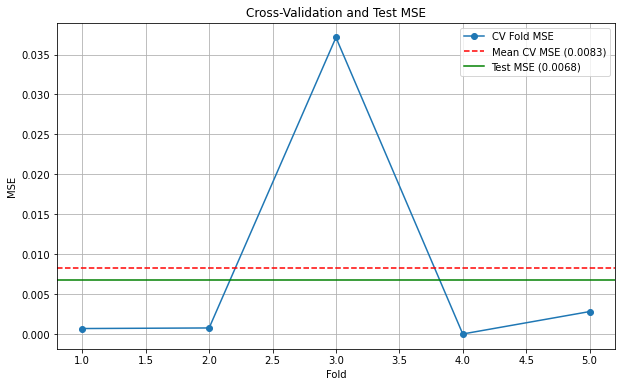

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, label='CV Fold MSE', marker='o')


plt.axhline(np.mean(cv_scores), color='red', linestyle='--', label=f'Mean CV MSE ({np.mean(cv_scores):.4f})')

plt.axhline(test_mse, color='green', linestyle='-', label=f'Test MSE ({test_mse:.4f})')

plt.title('Cross-Validation and Test MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest Gird Search

I applied what was came out of result. I intended to restart however my computer's capacity is not enough for restarting all grid searches That I've done

In [37]:

param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y3_train)

print("Best Parameters:", grid_search.best_params_)

KeyboardInterrupt: 

References

<a>1- https://github.com/MShahabSepehri/CryptoMamba/blob/main/models/lstm.py<br>
2- https://colab.research.google.com/drive/1Bk4zPQwAfzoSHZokKUefKL1s6lqmam6S?usp=sharing#scrollTo=uD17zIbaIZ6n<br>
3- https://www.kaggle.com/code/melissamonfared/google-s-stock-price-prediction-lstm<br>
4- https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm<br>
5- https://www.kaggle.com/code/carlmcbrideellis/lstm-time-series-stock-price-prediction-fail<br>
6- https://www.kaggle.com/code/meetnagadia/bitcoin-price-prediction-using-lstm<br>
7- https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series<br>
8- https://github.com/AhmedTolba36996/Short-Term-Solar-Irradiance-Forecasting-using-a-Hybridized-CNN-LSTM-MLP-KN-Model/blob/main/karachi-v4.ipynb<br>
9- https://www.kaggle.com/code/prashant111/svm-classifier-tutorial#Support-Vector-Machines-Classifier-Tutorial-with-Python<br>
10- https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial#Random-Forest-Classifier-Tutorial-with-Python<br>
11- https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial<br>
12- ChatGpt<br>
13- https://www.sciencedirect.com/science/article/abs/pii/S0957417414004473<br>
14- https://doi.org/10.1016/j.frl.2024.105874<br>
15- https://ieeexplore.ieee.org/abstract/document/9165760<br>
16- https://doi.org/10.54216/FPA.170114<br>
17- https://arxiv.org/abs/2501.01010<br>
18- https://doi.org/10.61356/SMIJ.2025.10448<br>
19- https://etasr.com/index.php/ETASR/article/view/9363<br>
20- https://doi:10.20944/preprints202409.1904.v1<br>
21- https://doi.org/10.3390/fractalfract7020203<br>
22- https://www.cryptoarchive.com.au/downloads (for data)<br>
23- stackoverflow</a>